In [1]:
import os
print(os.getcwd())

from scripts.example_module import example_function

# Call the function
example_function()

f:\Github\ML Classification Deployment\ML_Deployment\notebooks
Example function executed successfully!


In [2]:
from scripts.load_data import load_data

# Load the dataset
file_path = '../data/flight_df.csv'

# Load the data as a dataframe
df = load_data(file_path)

# Select specified columns for app
selected_columns = ['Inflight wifi service',
                    'Online boarding',
                    'Business Travel',
                    'Inflight entertainment',
                    'Loyal Customer',
                    'Checkin service',
                    'Flight Distance',
                    'Age',
                    'Seat comfort',
                    'Class',
                    'satisfied']

# Filter the dataframe to use only the selected columns
df = df[selected_columns]
df.head()

,Inflight wifi service,Online boarding,Business Travel,Inflight entertainment,Loyal Customer,Checkin service,Flight Distance,Age,Seat comfort,Class,satisfied
0,2,2,1,2,1,3,2062,26,2,3,0
1,5,4,1,4,1,4,680,52,4,3,1
2,3,3,0,3,1,4,188,28,3,1,0
3,3,4,1,3,1,4,453,54,4,3,0
4,4,4,1,4,1,3,775,40,4,1,0


In [3]:
from sklearn.model_selection import train_test_split

# Define target and features
y=df['satisfied']
X= df.drop(columns='satisfied')


In [4]:
import os

file = '../data/new_flight_df.csv'

try:
    # Save the features dataframe for the app
    X.to_csv(file, index=False)
    
    # Confirm save if successful
    if os.path.exists(file):
        print(f'Dataframe saved successfully to: {file}')
    else:
        print(f'Failed to save dataframe: {file}')
    
except Exception as error:
    print(f'Error saving dataframe to {file}: {error}')

Dataframe saved successfully to: ../data/new_flight_df.csv


In [5]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for class imbalance
y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

In [6]:
from scripts.preprocessing import create_preprocessing_pipeline

# Create preprocessor object
preprocessor = create_preprocessing_pipeline()

In [7]:
import pandas as pd
from scripts.preprocessing import preprocess_and_rebalance_data

# Preprocess and rebalance the data 
# Preprocess and rebalance the data
X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

# Convert preprocessed data back into a dataframe
X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_test_transformed_df = pd.DataFrame(X_test_transformed)


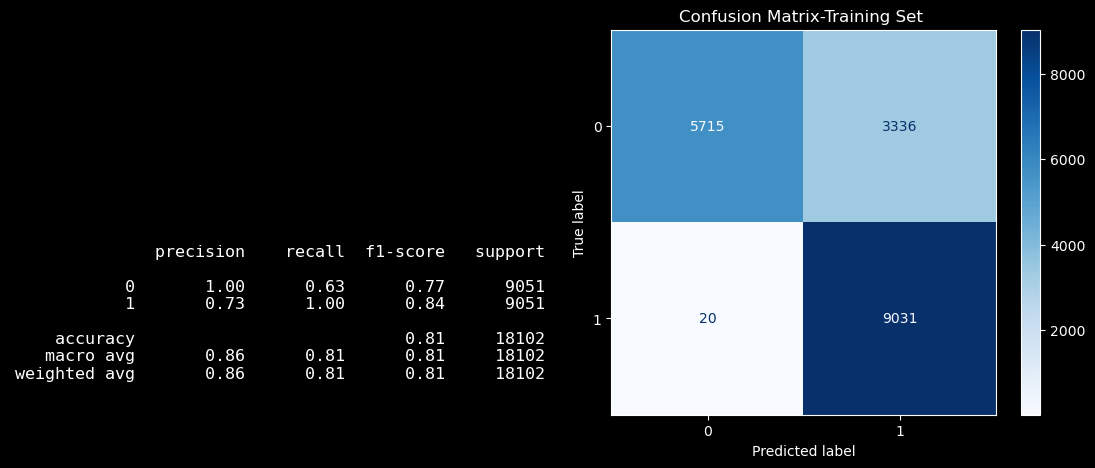

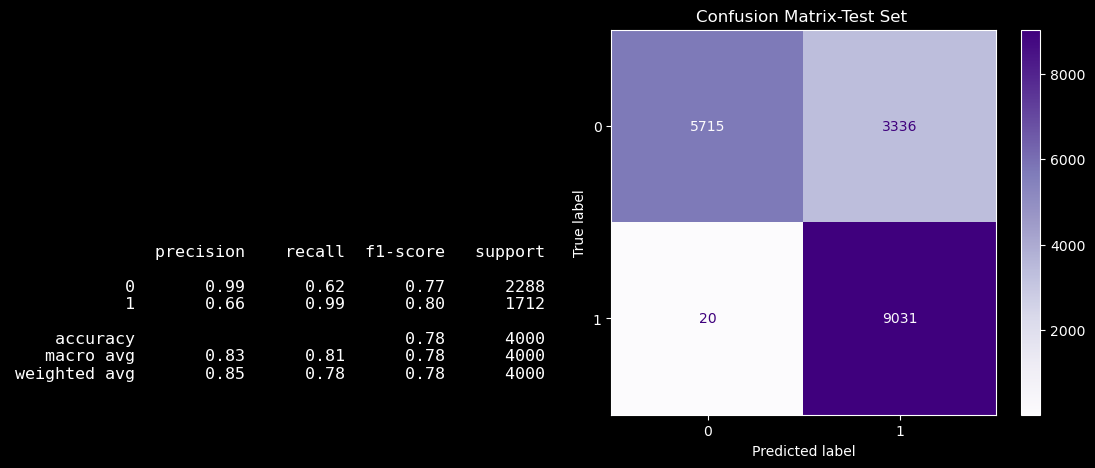

In [12]:
from scripts.train_evaluate import train_and_predict_model, evaluate_model, save_model
import lightgbm as lgb

# Instantiate the model
lgbm_model = lgb.LGBMClassifier(verbose=-1,random_state=42)

# Create predictions
train_preds, test_preds = train_and_predict_model(X_train_balanced_df,y_train_balanced,X_test_transformed_df,preprocessor,lgbm_model)

# Return the train and test report
train_report, test_report = evaluate_model(lgbm_model,X_train_balanced_df,y_train_balanced,X_test_transformed_df,y_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Classifier
dec_tree = DecisionTreeClassifier()

# Create and save predictions
train_report, test_report = train_and_predict_model(X_train_balanced_df,y_train_balanced,X_test_transformed_df,preprocessor,dec_tree)

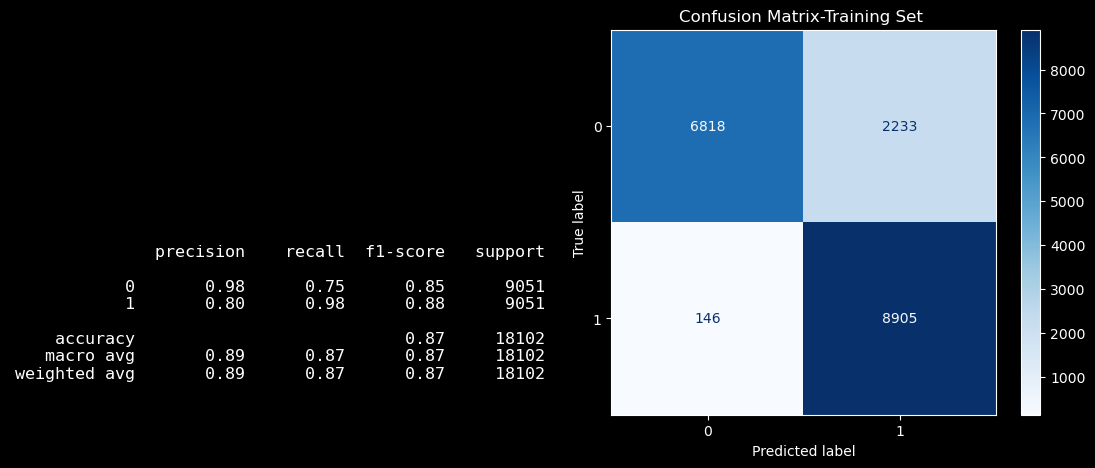

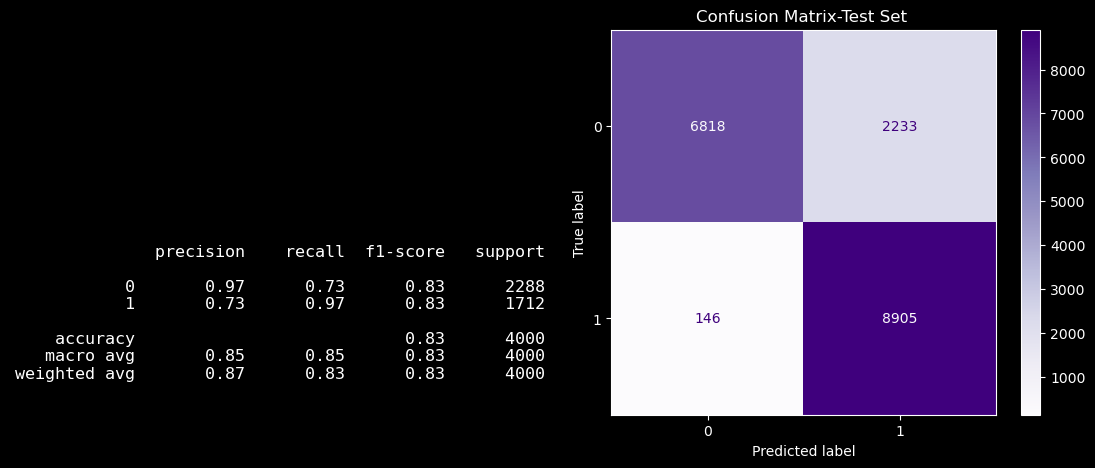

In [14]:
train_report, test_report = evaluate_model(dec_tree,X_train_balanced_df,y_train_balanced,X_test_transformed_df,y_test)

In [15]:
# Save the trained models
model_path = '../models/lgbm_model.joblib'
save_model(lgbm_model, model_path)

model_path = '../models/dec_tree.joblib'
save_model(dec_tree, model_path)


Model saved successfully to: ../models/lgbm_model.joblib
Model saved successfully to: ../models/dec_tree.joblib


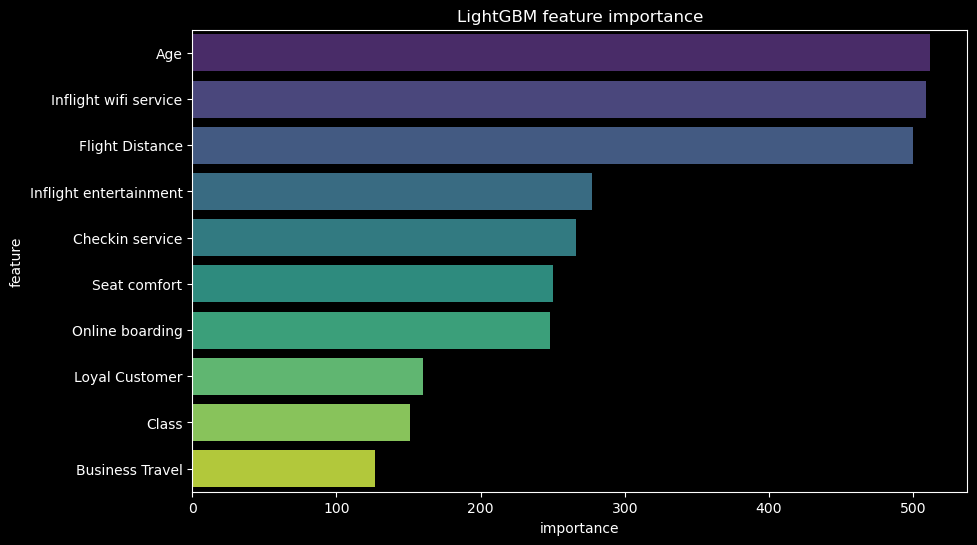

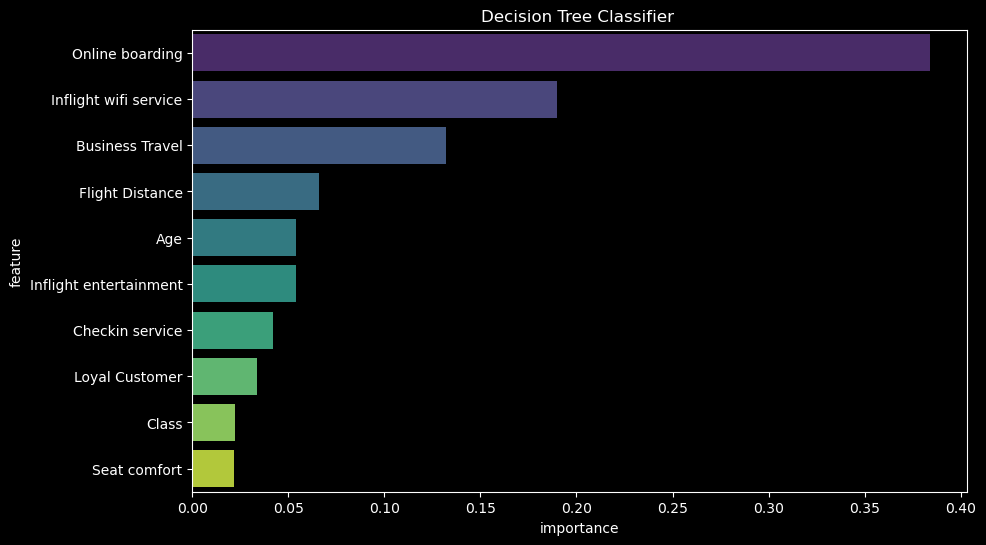

In [16]:
from scripts.feature_importance import train_model, get_feature_importance, plot_feature_importance

# Get feature names 
feature_names = X_train.columns

# Train LGBMClassifier
trained_lgbm_model = train_model(lgbm_model,X_train_balanced,y_train_balanced)

# Get and plot feature importances of the LGBMClassifier
lgbm_feature_importance = get_feature_importance(trained_lgbm_model, feature_names)
plot_feature_importance(lgbm_feature_importance, title='LightGBM feature importance')


# Train DEC_TREE
trained_dec_tree = train_model(dec_tree,X_train_balanced,y_train_balanced)

# Get and plot feature importances of the DecisionTreeClassifier
dec_feature_importance = get_feature_importance(trained_dec_tree, feature_names)
plot_feature_importance(dec_feature_importance, title='Decision Tree Classifier ')
